# Logistic Regression using Neural Networks

## Aim: To implement a neural network model to classify the given data using logistic regression.

## Dataset: Toy dataset with 2 classses.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

In [ ]:
x,y=make_classification(500,5,n_classes=2,random_state=1)

In [ ]:
x_train,x_rem,y_train,y_rem=train_test_split(x,y,test_size=0.30)
x_test,x_val,y_test,y_val=train_test_split(x_rem,y_rem,test_size=0.5)
print(f"Shape of X\nTrain {x_train.shape}\nValidation {x_val.shape}\nTest {x_test.shape}\n")
print(f"Shape of Y\nTrain {y_train.shape}\nValidation {y_val.shape}\nTest {y_test.shape}")

Shape of X
Train (350, 5)
Validation (75, 5)
Test (75, 5)

Shape of Y
Train (350,)
Validation (75,)
Test (75,)


In [ ]:
model=Sequential()
model.add(Dense(55,input_dim=5,activation='sigmoid'))
model.add(Dense(50,activation='sigmoid'))
model.add(Dense(25,activation='tanh'))
model.add(Dense(13,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 55)                330       
                                                                 
 dense_56 (Dense)            (None, 50)                2800      
                                                                 
 dense_57 (Dense)            (None, 25)                1275      
                                                                 
 dense_58 (Dense)            (None, 13)                338       
                                                                 
 dense_59 (Dense)            (None, 1)                 14        
                                                                 
Total params: 4,757
Trainable params: 4,757
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=150,verbose=0)

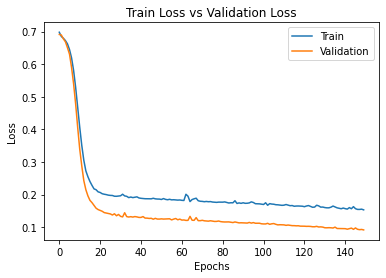

In [ ]:
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title("Train Loss vs Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)


3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
for i in range(10):
 print(f"X={x_test[i]}, Actual={y_test[i]}, Predicted={y_pred[i]}")

X=[-0.85115199  0.82847663 -1.25544095  0.27915545 -1.15140471], Actual=0, Predicted=0
X=[-0.54919344  0.46793043 -0.37097042 -0.58702901  0.0890736 ], Actual=1, Predicted=0
X=[ 0.55173586 -0.35607046 -0.37870949  0.5208122  -1.51327329], Actual=0, Predicted=0
X=[ 0.8912972  -0.84259085  1.15016628 -0.39629329  0.89403011], Actual=1, Predicted=0
X=[ 0.8951263  -0.85932498  1.24152653 -1.43206703  1.06162229], Actual=1, Predicted=0
X=[ 0.36165558 -0.44114638  1.12074844 -0.24282642  1.60209935], Actual=1, Predicted=0
X=[ 0.59977604 -0.63125628  1.19740227 -1.33569545  1.40394658], Actual=1, Predicted=0
X=[ 1.54493792 -1.38092656  1.46920539 -0.77589482  0.55592782], Actual=1, Predicted=0
X=[-0.66250833  0.69020257 -1.2759962   0.16280825 -1.46240245], Actual=0, Predicted=0
X=[ 0.33913452 -0.40832808  1.01572083  1.52924786  1.43556576], Actual=1, Predicted=0


In [ ]:
yt_pred=model.predict(x_train)
yt_pred=np.argmax(yt_pred,axis=1)

11/11 [==============================] - 0s 2ms/step


In [ ]:

yv_pred=model.predict(x_val)
yv_pred=np.argmax(yv_pred,axis=1)

3/3 [==============================] - 0s 3ms/step


In [ ]:
print("Accuracy of train",round(accuracy_score(y_train,yt_pred)*100,2),'%')

Accuracy of train 48.29 %


In [ ]:
print("Accuracy of Validation",round(accuracy_score(y_val,yv_pred)*100,2),'%')

Accuracy of Validation 62.67 %


In [ ]:
print("Accuracy of test",round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy of test 48.0 %


In [ ]:
train=model.evaluate(x_train,y_train)
print(f'Train accuracy {round(train[1]*100)}%')
validate=model.evaluate(x_val,y_val)
print(f'Validation accuracy {round(validate[1]*100)}%')

11/11 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.9257
Train accuracy 93%
3/3 [==============================] - 0s 5ms/step - loss: 0.1620 - accuracy: 0.9600
Validation accuracy 96%


## Conclusion: The above model gave a train accuracy of 95% , validation accuracy of 49.33% and test accuracy of 50%, thus the model is overfitting we have to tune our model for best fit.